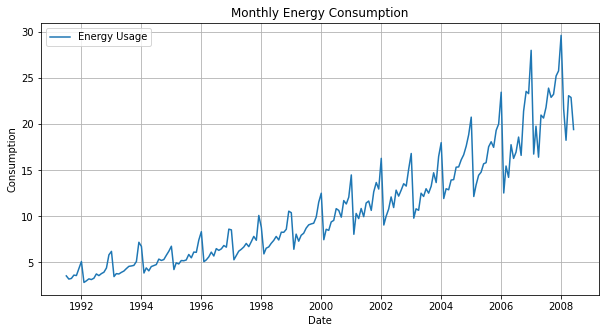

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=526.837, Time=3.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=659.245, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=560.558, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=529.539, Time=0.51 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=525.356, Time=2.27 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=551.838, Time=0.65 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=526.365, Time=4.16 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=530.219, Time=1.68 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=inf, Time=8.31 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=527.568, Time=1.76 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=529.582, Time=1.47 sec
 ARIMA(3,1,2)(0,1,1)[12]             : AIC=520.313, Time=2.03 sec
 ARIMA(3,1,2)(0,1,0)[12]             : AIC=544.911, Time=0.96 sec
 ARIMA(3,1,2)(1,1,1)[12]             : AIC=521.966, Time=2.43 sec
 ARIMA(3,1,2)(0,1,2)[12]             

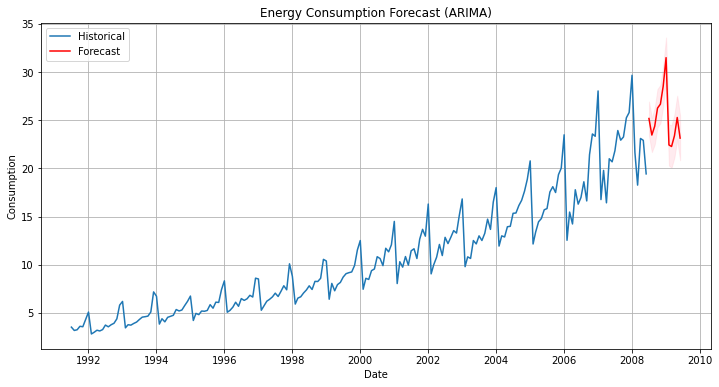

 Original data saved as 'original_energy_data.csv'
 Forecast-only data saved as 'forecast_only.csv'
 Combined data saved as 'energy_forecast.csv'
 Plots saved as 'original_energy_consumption.png' and 'energy_forecast_plot.png'


In [4]:
# Energy Consumption Forecasting with ARIMA

# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

# 📊 Step 2: Load Sample Energy Dataset (monthly data)
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url)

# Rename columns and prepare datetime index
df.columns = ['Date', 'Energy_Consumption']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 🖼 Step 3: Visualize Original Time Series
plt.figure(figsize=(10, 5))
plt.plot(df['Energy_Consumption'], label='Energy Usage')
plt.title("Monthly Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()
plt.savefig("original_energy_consumption.png")  # Save plot as PNG
plt.show()

# Save original historical data to CSV
df.to_csv("original_energy_data.csv")

# 🧠 Step 4: Auto ARIMA Model Fitting
model = auto_arima(df['Energy_Consumption'], 
                   seasonal=True, m=12, 
                   trace=True, 
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

# 📈 Step 5: Forecast Future Values
n_periods = 12  # Forecast next 12 months
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Generate future dates for forecast
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# Create Forecast DataFrame with confidence intervals
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1],
    'Energy_Consumption': [None]*n_periods  # ← This ensures no misalignment
})
forecast_df.set_index('Date', inplace=True)

# Save forecast-only data to CSV
forecast_df[['Forecast', 'Lower_CI', 'Upper_CI']].to_csv("forecast_only.csv")

# 📊 Step 6: Plot Forecast along with Historical Data
plt.figure(figsize=(12, 6))
plt.plot(df['Energy_Consumption'], label='Historical')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.3)
plt.title("Energy Consumption Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.savefig("energy_forecast_plot.png")  # Save forecast plot as PNG
plt.show()

# 📝 Step 7: Combine Historical + Forecast Data and Export to CSV
# Add empty forecast columns to historical data
df_with_forecast_cols = df.copy()
df_with_forecast_cols['Forecast'] = None
df_with_forecast_cols['Lower_CI'] = None
df_with_forecast_cols['Upper_CI'] = None

# Combine vertically with same column order
combined_df = pd.concat([df_with_forecast_cols, forecast_df], axis=0)

# Reorder columns for neatness
combined_df = combined_df[['Energy_Consumption', 'Forecast', 'Lower_CI', 'Upper_CI']]

# Export combined data to CSV
combined_df.to_csv("energy_forecast.csv")

print(" Original data saved as 'original_energy_data.csv'")
print(" Forecast-only data saved as 'forecast_only.csv'")
print(" Combined data saved as 'energy_forecast.csv'")
print(" Plots saved as 'original_energy_consumption.png' and 'energy_forecast_plot.png'")
